# Created by - Sanjana Pal

Decision Tree
 
Assignment


About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
## Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [1]:
# importing library
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as pe
import seaborn as sns
import pandas_bokeh
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv("Company_Data.csv")

In [3]:
df.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

# EDA

In [4]:
# df.corr(),shows the correlation between the columns.
df.corr()

Sales  CompPrice    Income  Advertising  Population     Price  \
Sales        1.000000   0.064079  0.151951     0.269507    0.050471 -0.444951   
CompPrice    0.064079   1.000000 -0.080653    -0.024199   -0.094707  0.584848   
Income       0.151951  -0.080653  1.000000     0.058995   -0.007877 -0.056698   
Advertising  0.269507  -0.024199  0.058995     1.000000    0.265652  0.044537   
Population   0.050471  -0.094707 -0.007877     0.265652    1.000000 -0.012144   
Price       -0.444951   0.584848 -0.056698     0.044537   -0.012144  1.000000   
Age         -0.231815  -0.100239 -0.004670    -0.004557   -0.042663 -0.102177   
Education   -0.051955   0.025197 -0.056855    -0.033594   -0.106378  0.011747   

                  Age  Education  
Sales       -0.231815  -0.051955  
CompPrice   -0.100239   0.025197  
Income      -0.004670  -0.056855  
Advertising -0.004557  -0.033594  
Population  -0.042663  -0.106378  
Price       -0.102177   0.011747  
Age          1.000000   0.006488  
Education    0.006488   1.000000

In [5]:
df.info() # it shows the Dtype of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
# describe shows the mean,median percentile of the column
df.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

In [7]:
# isna shows the presences of null into the column.
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [8]:
df.isna()

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  \
0    False      False   False        False       False  False      False   
1    False      False   False        False       False  False      False   
2    False      False   False        False       False  False      False   
3    False      False   False        False       False  False      False   
4    False      False   False        False       False  False      False   
..     ...        ...     ...          ...         ...    ...        ...   
395  False      False   False        False       False  False      False   
396  False      False   False        False       False  False      False   
397  False      False   False        False       False  False      False   
398  False      False   False        False       False  False      False   
399  False      False   False        False       False  False      False   

       Age  Education  Urban     US  
0    False      False  False  False  
1    False      False  False  False  
2    False      False  False  False  
3    False      False  False  False  
4    False      False  False  False  
..     ...        ...    ...    ...  
395  False      False  False  False  
396  False      False  False  False  
397  False      False  False  False  
398  False      False  False  False  
399  False      False  False  False  

[400 rows x 11 columns]

In [9]:
df['Sales'].mean()

7.496325

- sales maximum value is 16.270000 so we can set our threshold that is sales greater 10 is 1 and less than 10 is 0

    

In [10]:
df['Sales'] = df['Sales'].apply(lambda x:1 if x>=8 else 0)
df['Sales']

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: Sales, Length: 400, dtype: int64

In [11]:
df['Sales'].value_counts()

0    236
1    164
Name: Sales, dtype: int64

In [12]:
# using replace function for column shelvelocation
df['ShelveLoc'].replace(['Bad','Medium','Good'],[0,1,2],inplace=True)

In [13]:
# use get dummies for urban and us column
df = pd.get_dummies(data=df,columns=['Urban','US'],drop_first=True)
df

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0        1        138      73           11         276    120          0   42   
1        1        111      48           16         260     83          2   65   
2        1        113      35           10         269     80          1   59   
3        0        117     100            4         466     97          1   55   
4        0        141      64            3         340    128          0   38   
..     ...        ...     ...          ...         ...    ...        ...  ...   
395      1        138     108           17         203    128          2   33   
396      0        139      23            3          37    120          1   55   
397      0        162      26           12         368    159          1   40   
398      0        100      79            7         284     95          0   50   
399      1        134      37            0          27    120          2   49   

     Education  Urban_Yes  US_Yes  
0           17          1       1  
1           10          1       1  
2           12          1       1  
3           14          1       1  
4           13          1       0  
..         ...        ...     ...  
395         14          1       1  
396         11          0       1  
397         18          1       1  
398         12          1       1  
399         16          1       1  

[400 rows x 11 columns]

In [14]:
object_columns = df.select_dtypes(include=['object']).columns # it will select only object columns

In [15]:
object_columns

Index([], dtype='object')

In [16]:
# i have created a for loop for object columns to converted into a numerical values.
#label_dict = {}

#for col in object_columns:
    #le = LabelEncoder()
    #df[col] = le.fit_transform(df[col])
    #label_dict[col] = dict(zip(le.transform(le.classes_),le.classes_))
   # print(col,label_dict[col])

- in ShelveLoc columns there are three category bad,good and medium.labelencoder convert bad=0,good=1 and medium=2,and in Urban columns there are two categories yes and no,in which labelencoder convert yes =1 and no =0 same for US column

In [17]:
df.head()

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0      1        138      73           11         276    120          0   42   
1      1        111      48           16         260     83          2   65   
2      1        113      35           10         269     80          1   59   
3      0        117     100            4         466     97          1   55   
4      0        141      64            3         340    128          0   38   

   Education  Urban_Yes  US_Yes  
0         17          1       1  
1         10          1       1  
2         12          1       1  
3         14          1       1  
4         13          1       0

<AxesSubplot:>

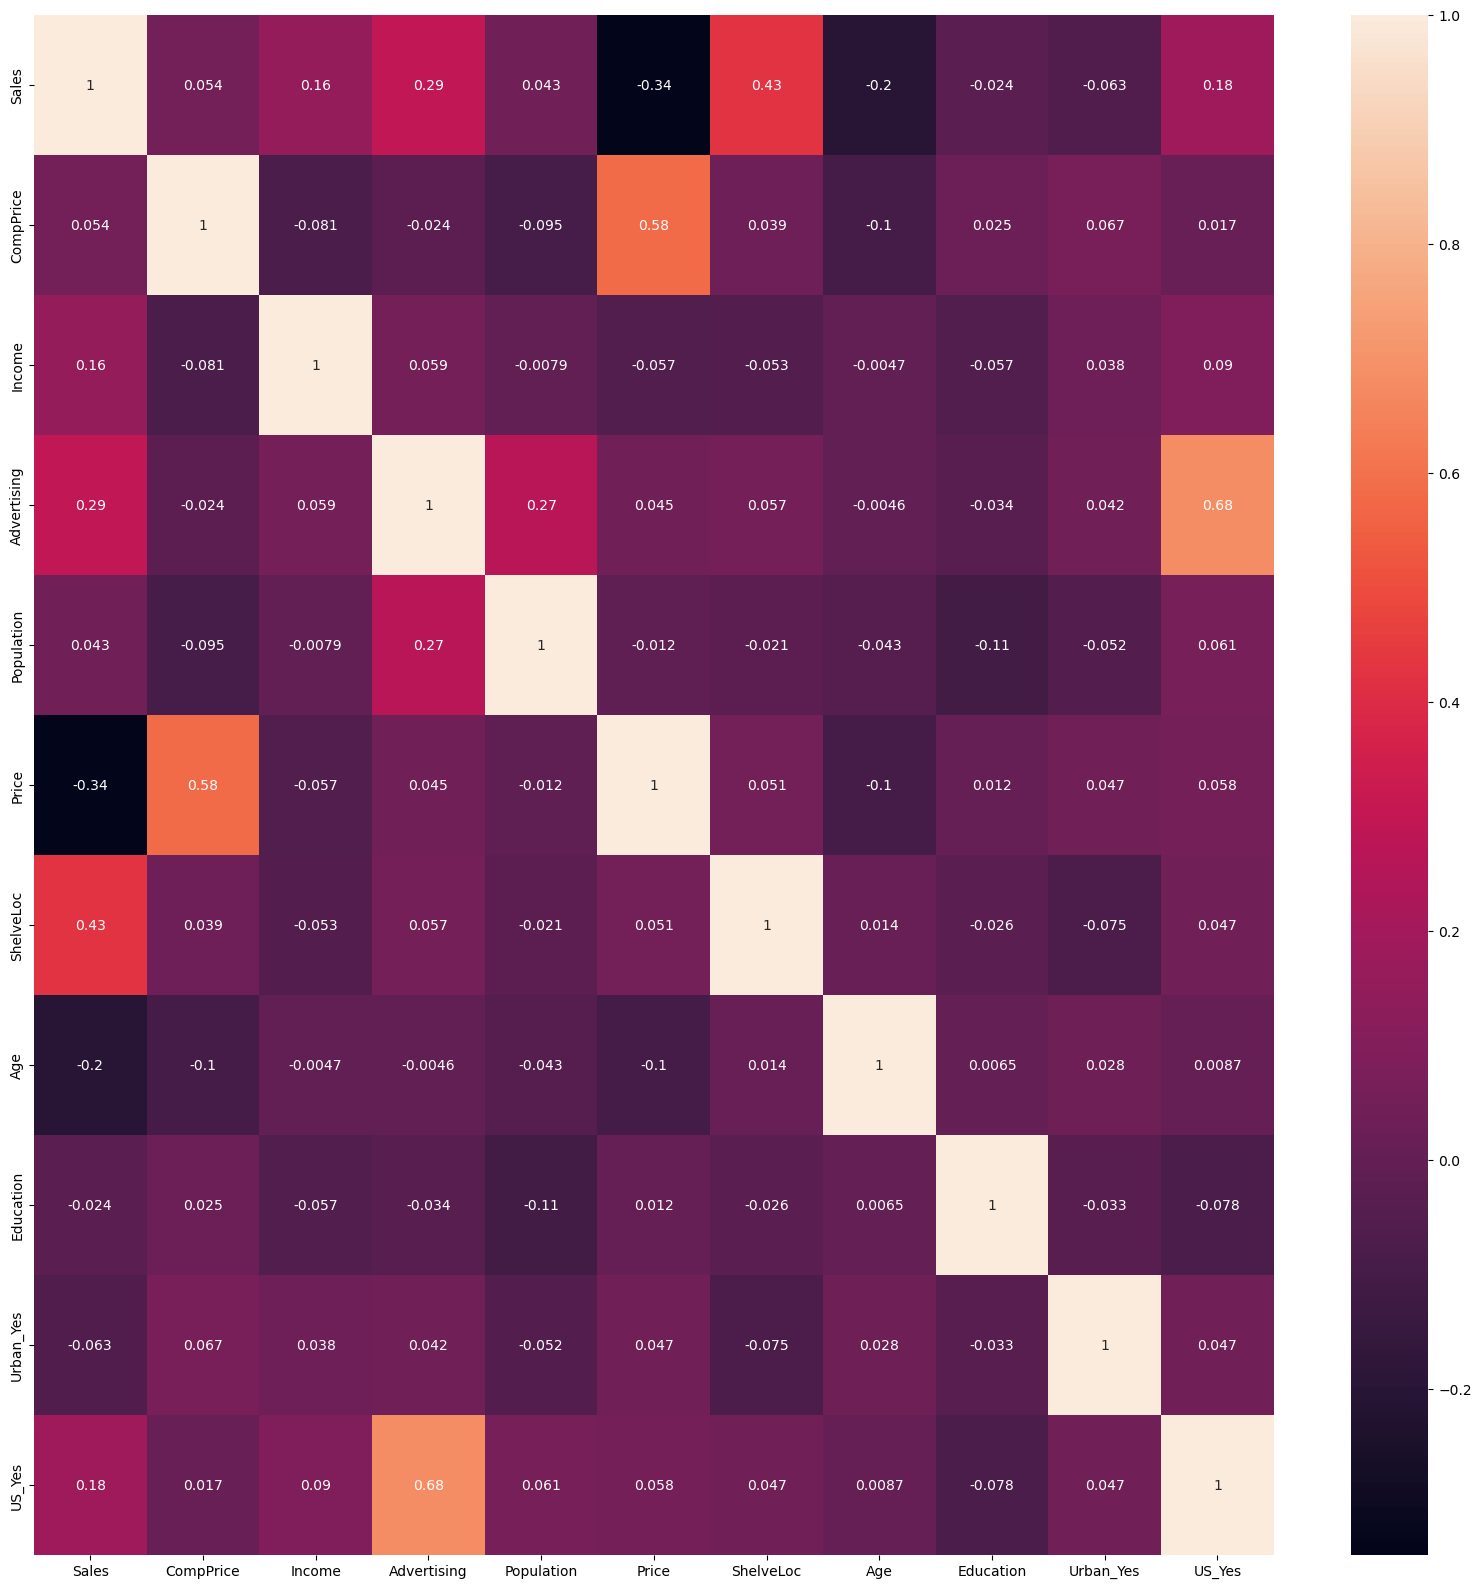

In [18]:
# heatmap shows the correlation between the column. 1 indicates there is 100% correlation between columns.
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

- heatmap shows the negative and positive correlation between the column.

# Visualization

In [19]:
# plotly shows the scatter plot between three columns ,in plotly color is working as hue parameter which shows the Target column.
pe.scatter_3d(x = df['CompPrice'],y=df['Sales'],z =df['CompPrice'],color=df['ShelveLoc'])

In [20]:
# bokeh libary,show the attractive line plot.
df.plot_bokeh.line()

Figure(id='1002', ...)

In [21]:
# Here boxplot of every columns is shown in one figure,and every boxplot shows the outlier present into the column.
pe.box(df)

- AS we saw there is presence of outlier into the data, we can cap that outliers.

In [22]:
# we are capping the data
Q3 = df['Price'].quantile(q=0.75)
print("Q3:", Q3)
Q1 = df['Price'].quantile(q=0.25)
print("Q1:", Q1)
IQR = Q3-Q1
print("IQR:", IQR)
upper_boundary = Q3 + 1.5*IQR
print(upper_boundary)
lower_boundary = Q1 - 1.5*IQR
print(lower_boundary)

Q3: 131.0
Q1: 100.0
IQR: 31.0
177.5
53.5


In [23]:
df[(df['Price']>180)]

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
165      0        147      58            7         100    191          0   27   
174      0        139      24            0         358    185          1   79   

     Education  Urban_Yes  US_Yes  
165         15          1       1  
174         15          0       0

In [24]:
df['Price'].replace([191,185],177,inplace=True)

In [25]:
df[(df['Price']<53)]

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
42       1         77      69            0          25     24          1   50   
125      1         89      78            0         181     49          1   43   

     Education  Urban_Yes  US_Yes  
42          18          1       0  
125         15          0       0

In [26]:
df['Price'].replace([24,49],53,inplace=True)

# Data Splitting

In [27]:
# Here data splitting is perform , data is splitted into training data and testing data 
x = df.drop('Sales',axis=1)
y = df['Sales']

from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

#view transformed values
print(y_transformed)

In [28]:
df['ShelveLoc'].unique()

array([0, 2, 1], dtype=int64)

In [29]:
#y = y.astype(int)

In [30]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)

In [31]:
print(' X Training  Shape:', xtrain.shape)
print('Y Training  Shape:', ytrain.shape)
print('X Testing  Shape:', xtest.shape)
print('Y Testing  Shape:', ytest.shape)

 X Training  Shape: (280, 10)
Y Training  Shape: (280,)
X Testing  Shape: (120, 10)
Y Testing  Shape: (120,)


In [32]:
xtrain

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
69         127      59            0         339     99          1   65   
273        116     106            8         244     86          1   58   
226        119      33            0         245    122          2   56   
305        115      29           26         394    132          1   33   
92         114     113            0          97    125          1   29   
..         ...     ...          ...         ...    ...        ...  ...   
215        116      83           15         170    144          0   71   
174        139      24            0         358    177          1   79   
180        137     112           15         434    149          0   66   
306        131      32            1          85    133          1   48   
138        125     103           12         371    109          1   44   

     Education  Urban_Yes  US_Yes  
69          12          1       0  
273         12          1       1  
226         14          1       0  
305         13          1       1  
92          12          1       0  
..         ...        ...     ...  
215         11          1       1  
174         15          0       0  
180         13          1       1  
306         12          1       1  
138         10          1       1  

[280 rows x 10 columns]

In [33]:
ytrain

69     0
273    1
226    0
305    1
92     0
      ..
215    0
174    0
180    0
306    0
138    1
Name: Sales, Length: 280, dtype: int64

In [34]:
df.duplicated().sum()

0

In [35]:
df['ShelveLoc'].value_counts()

1    219
0     96
2     85
Name: ShelveLoc, dtype: int64

 - here we saw that this features have categories ,0,1,2 which unbalance in first SHELVELOC column 3 categories are there 1 - 219 times,0-96,and 2=85,that means ,model will understand 1 very well,but it fail to understand 0 and 2.In second Urban column 1 -282 times ans 0-118 times ,same here model is good to predict 1 but not 0,to overcome with this issue we are using smote.

# Model Building

In [36]:
# After splitting the data,model building is perform
#from sklearn.metrics import r2_score

In [37]:
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

In [38]:
ypred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [39]:
dt.score(xtrain,ytrain), dt.score(xtest,ytest) # its an evaluation metrics,which shows the training and testing accuracy.

(1.0, 0.7666666666666667)

### Training Accuracy is 1.0,and Testing Accuracy is 0.7666666666666667 ,it shows the presences of overting .To deal with overfiting we have to perform Hyperparameter Tuning.

In [40]:
feat_imp = pd.DataFrame({'features': x.columns,'importances': dt.feature_importances_})

In [41]:
feat_imp

features  importances
0    CompPrice     0.114304
1       Income     0.087596
2  Advertising     0.117177
3   Population     0.011179
4        Price     0.225984
5    ShelveLoc     0.203536
6          Age     0.147838
7    Education     0.052753
8    Urban_Yes     0.000000
9       US_Yes     0.039633

# HYperparameter Tuning

In [42]:
#GridSearchCV gives a best parameter from the multiple parameter,gridsearchcv fit the model the fint the total fits ,from total it will give best fit for model evaluation.
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline

In [43]:
params = {
       'max_depth':[2,4,5,6,7],
    'criterion':['gini','entropy','log_loss'],
    'splitter':['random','best']
}

In [44]:
grid = GridSearchCV(DecisionTreeClassifier(),param_grid=params,verbose=1)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 5, 6, 7],
                         'splitter': ['random', 'best']},
             verbose=1)

In [45]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 5, 'splitter': 'random'}

In [70]:
# after hyperparameter tuning ,reform the model and put the best_params which is given by gridsearchcv
dt = DecisionTreeClassifier(criterion='gini',max_depth=4,splitter='best')
dt.fit(xtrain,ytrain)
ypred= dt.predict(xtest)
ypred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [71]:
print(classification_report(ypred,ytest))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        82
           1       0.65      0.84      0.74        38

    accuracy                           0.81       120
   macro avg       0.78      0.82      0.79       120
weighted avg       0.83      0.81      0.81       120



In [72]:
dt.score(xtrain,ytrain),dt.score(xtest,ytest)

(0.8392857142857143, 0.8083333333333333)

### After hyperparamete overfitting issue totally resolve,variation between the training and testing accuracy is less than 5,after hyperparameter tuning training accuracy is 0.8392857142857143 and testing accuracy is 0.8083333333333333. 

USing SMOTE for unbalance data Smote is stand for synthetic minority over sampling technique.
Smote is only used for training data because in minority class it will increase the samples,and samples are artificially generated.

# SMOTE

! pip install imbalanced-learn import imblearn from sklearn.datasets import make_regression from imblearn.over_sampling import SMOTE

import imblearn from sklearn.datasets import make_regression from imblearn.over_sampling import SMOTE

import imblearn

In [49]:
import imblearn
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE,RandomOverSampler

In [50]:
sm = SMOTE(random_state=42)
xtrain_s,ytrain_s = sm.fit_resample(xtrain,ytrain)

In [51]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=4,splitter='best')
dt.fit(xtrain_s,ytrain_s)
y= dt.predict(xtest)
y

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [52]:
print(classification_report(ytest,y))

              precision    recall  f1-score   support

           0       0.78      0.59      0.67        71
           1       0.56      0.76      0.64        49

    accuracy                           0.66       120
   macro avg       0.67      0.67      0.66       120
weighted avg       0.69      0.66      0.66       120



- we obeserve that after hyperparameter tuning f1 score and accuracy is increased but after performing smote f1score is getting much better.

In [54]:
from sklearn import tree

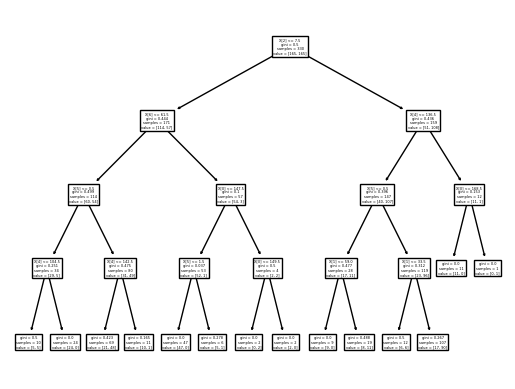

In [55]:
#plot_tree ,give us tree diagram of  all over dataset.
tree.plot_tree(dt)
plt.show()

# Pruning
- Performing pruning to decrease the lead node

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
pruned_clf = DecisionTreeClassifier(max_depth=3)
pruned_clf.fit(xtrain_s,ytrain_s)
ypred = pruned_clf.predict(xtest)

In [58]:
print('accuracy_score:',accuracy_score(ytest,ypred))

accuracy_score: 0.65


- After pruning accuaracy score is 0.65

In [59]:
plt.rcParams['figure.figsize']=(30,30)
plt.rcParams['figure.dpi']=(300)

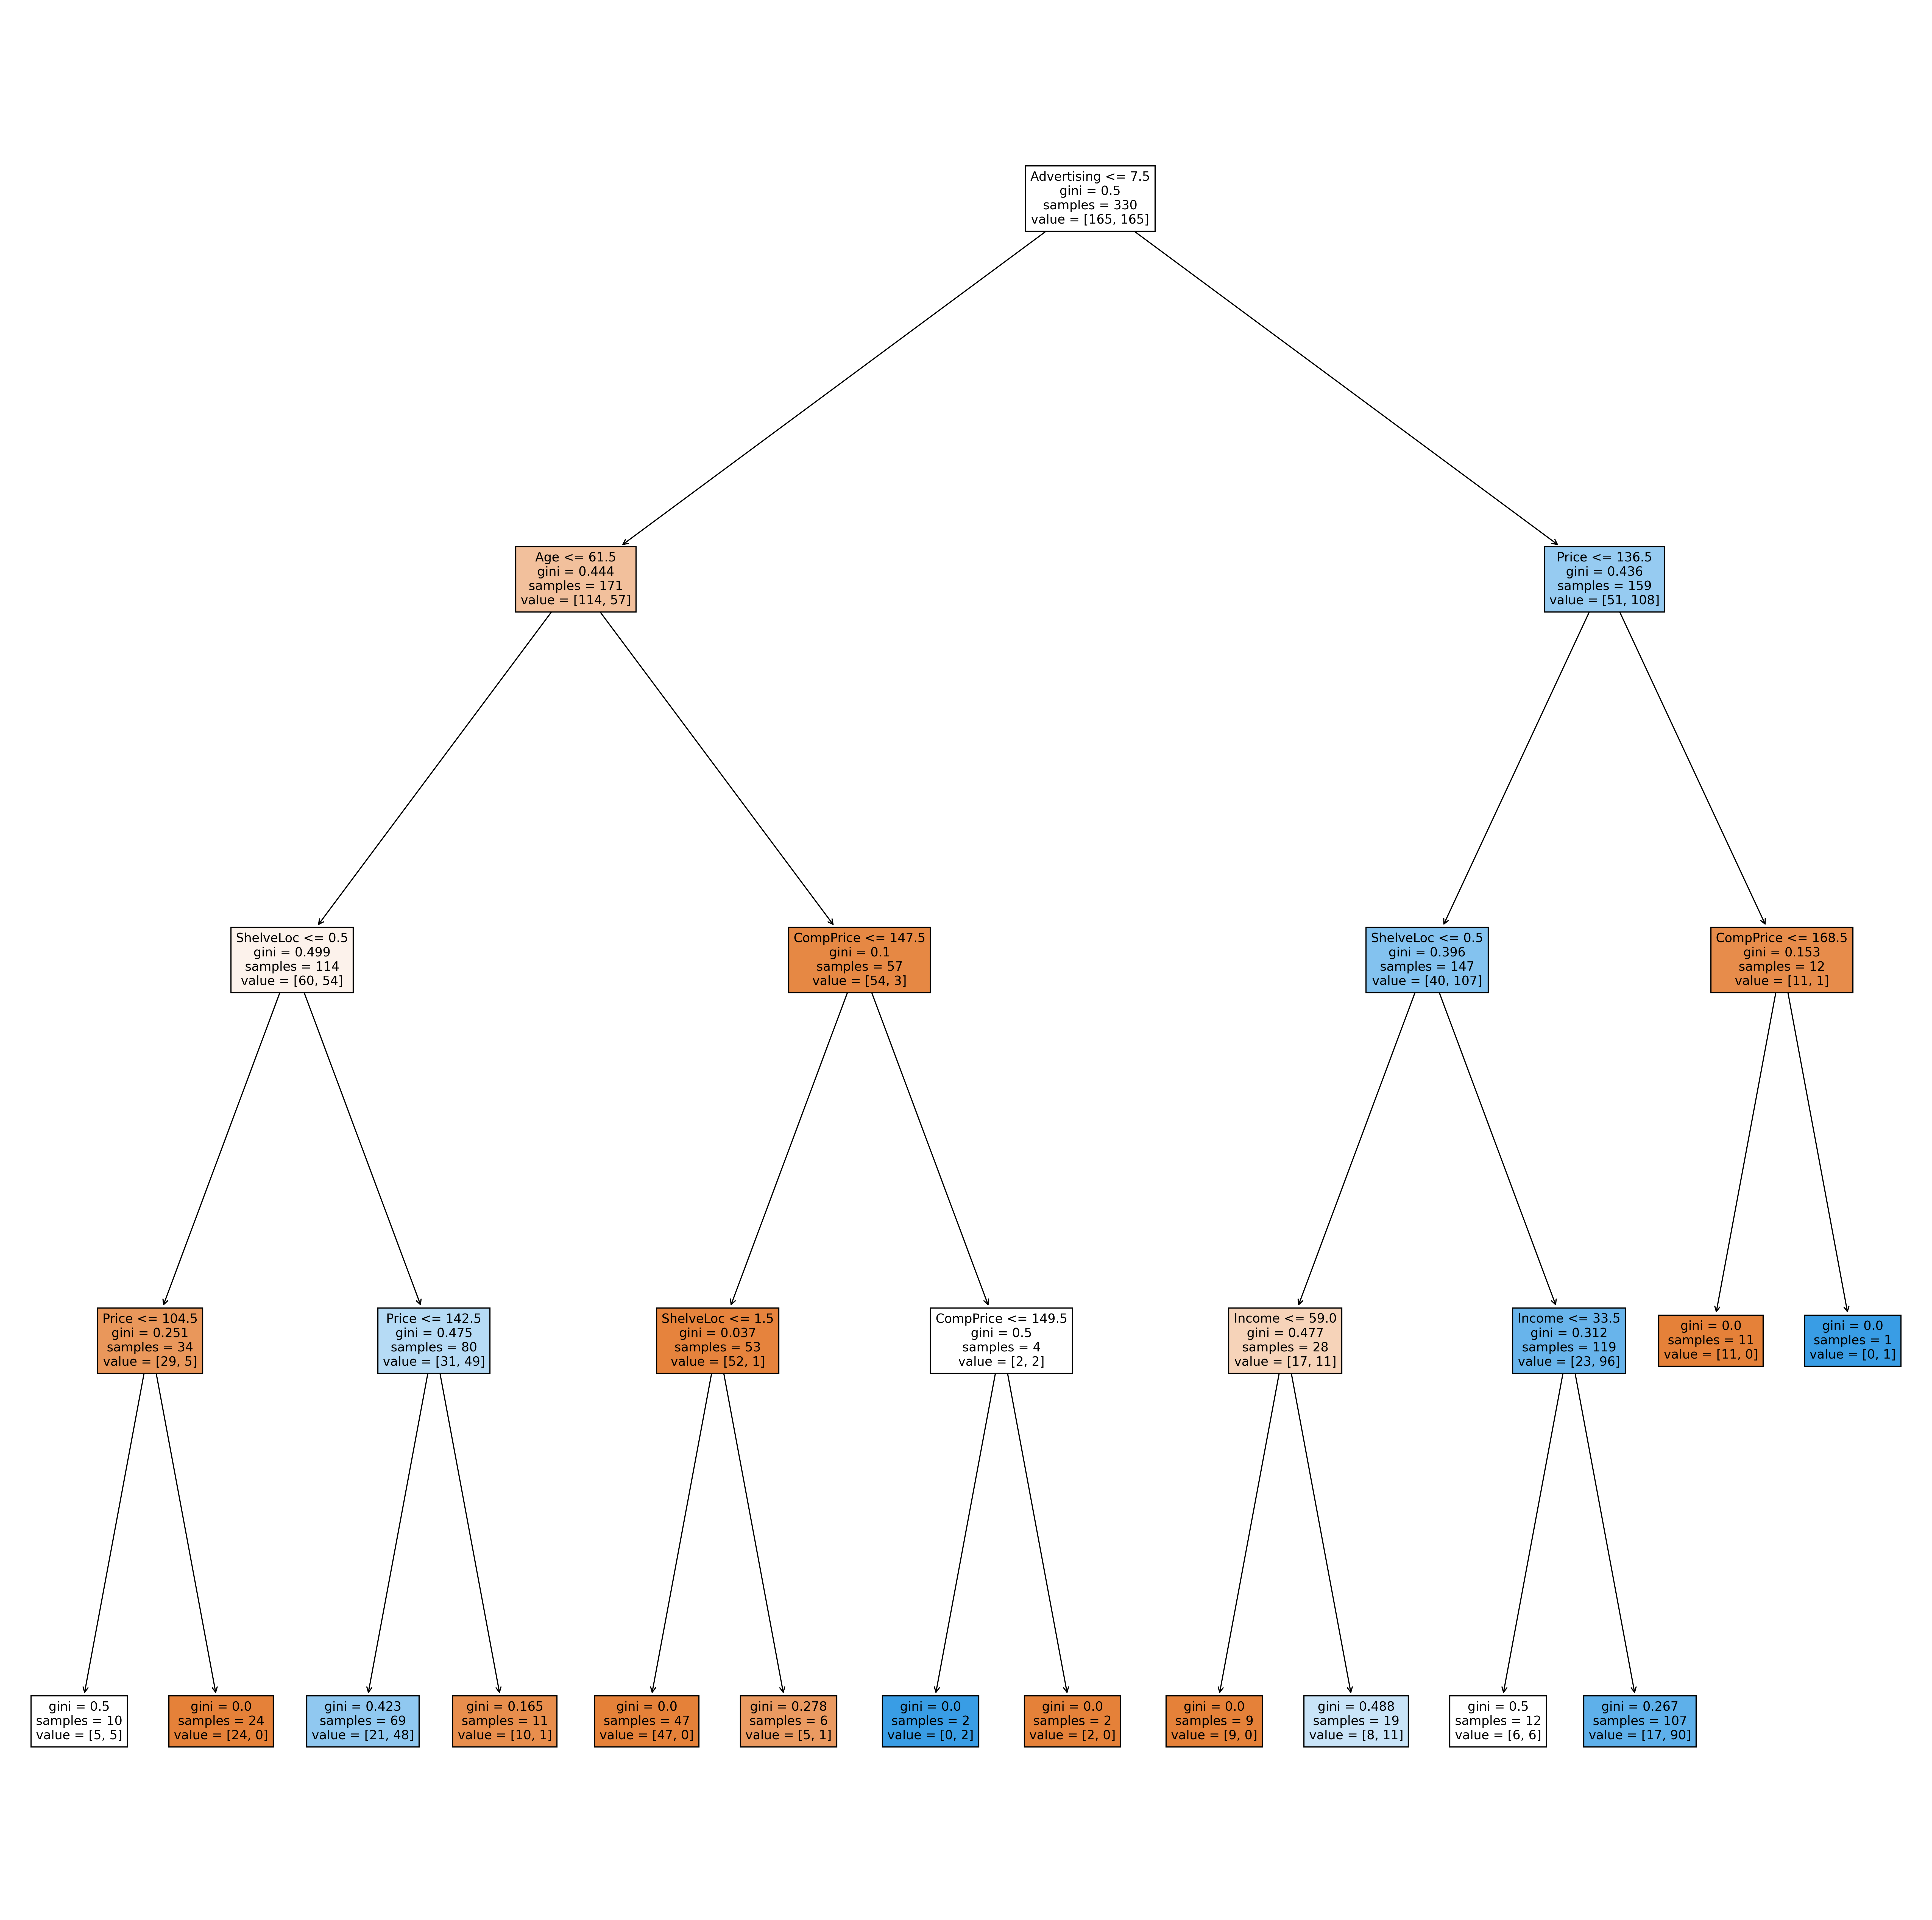

In [60]:
tree.plot_tree(dt,feature_names=x.columns,filled=True)
plt.show()

In [61]:
feat_imp = pd.DataFrame({'features':x.columns,'importances':dt.feature_importances_})

In [62]:
feat_imp = feat_imp.sort_values('importances',ascending=False)

In [63]:
feat_imp

features  importances
2  Advertising     0.236311
4        Price     0.235955
5    ShelveLoc     0.220505
6          Age     0.161484
1       Income     0.079163
0    CompPrice     0.066581
3   Population     0.000000
7    Education     0.000000
8    Urban_Yes     0.000000
9       US_Yes     0.000000

Since our goal of the problem is to identify the importance of the Attributes hence we have found the feature and their corresponding importance. Answer to our Problem statment is the most important feature contributing for Sale is ShelveLoc and next is Price"